In [76]:
%matplotlib inline
from __future__ import print_function

import os;
import codecs;
import re;
import json;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

import seaborn as sn;

In [8]:
from os.path import expanduser
home = expanduser("~")

In [47]:
lyrics = None;

with codecs.open(home+r'/letras/songs2.json', mode='r') as outfile:
    lyrics = json.load(outfile);

In [48]:
df = pd.DataFrame(lyrics);

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53486 entries, 0 to 53485
Data columns (total 7 columns):
artist         53486 non-null object
compositor     53486 non-null object
contributor    53486 non-null object
exbibitions    53486 non-null object
genre          53486 non-null object
songHtml       53486 non-null object
title          53486 non-null object
dtypes: object(7)
memory usage: 2.9+ MB


In [50]:
df.head()

,artist,compositor,contributor,exbibitions,genre,songHtml,title
0,1Kilo,,7957031,[ 40.026],Hip Hop/Rap,<p>[Chino]\nA menina doce me olha\nSeus olhos ...,O Surto
1,1Kilo,DoisP / Knust / Pablo Martins / Rafael Sadan,7871371,[ 49.954],Hip Hop/Rap,<p>[Pablo]\nAten&#231;&#227;o de soldados na g...,Reza Sincera
2,1Kilo,Pablo Martins / Pelé MilFlows,4187525,[ 4.276],Hip Hop/Rap,<p>[Pablo]\nEnquanto as nuvens me guiam eu bat...,Porta do Céu
3,1Kilo,DoisP / MZ / Pablo Martins,4187525,[ 4.351],Hip Hop/Rap,<p>[Pablo]\nAs luzes da boate refletem quando ...,Amor e Vingança
4,1Kilo,,7010597,[ 3.897],Hip Hop/Rap,<p>Lindaaaa\nBela princesa\nQuando me beija\nE...,Linda (part. Nosense)


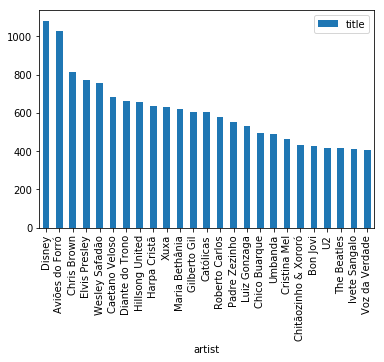

In [77]:
df[['artist','title']] \
    .groupby(by=['artist'])\
    .count()\
    .reset_index()\
    .sort_values(by='title',ascending=False)\
    .head(25)\
    .plot.bar(x='artist',y='title')

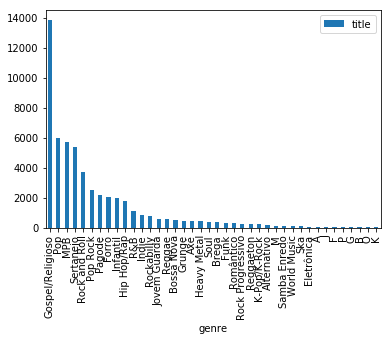

In [86]:
plt.figure(figsize=(10,2))
df[['genre','title']] \
    .groupby(by=['genre'])\
    .count()\
    .reset_index()\
    .sort_values(by='title',ascending=False)\
    .head(40)\
    .plot.bar(x='genre',y='title');
plt.plot();

In [91]:
(df[df.genre == 'Gospel/Religioso'])[['artist','title']] \
    .groupby(by=['artist'])\
    .count()\
    .reset_index()\
    .sort_values(by='title',ascending=False)\
    .head(40)

,artist,title
21,Diante do Trono,665
36,Hillsong United,658
34,Harpa Cristã,637
11,Católicas,603
58,Padre Zezinho,551
74,Umbanda,488
17,Cristina Mel,464
76,Voz da Verdade,408
0,Aline Barros,402
13,Comunidade Católica Shalom,400
